# 6. Linear Regression with PyTorch
## 1. About Linear Regression


### 1.2 Example of simple linear regression

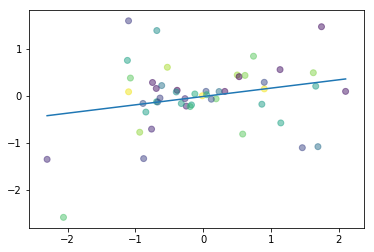

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x * np.random.randn(n)

colors = np.random.rand(n)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()


## 2. Building a Linear Regression Model with PyTorch

### 2.1 Example
- Coefficient: $\alpha = 2$
- Bias/intercept: $\beta = 1$
- Equation: $y = 2x + 1$

### 2.2 Building a Toy Dataset

In [2]:
x_values = [i for i in range(11)]
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [3]:
# Convert to numpy
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [4]:
# IMPORTANT: 2D required
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

$y = 2x + 1$

In [16]:
y_values = [2*i + 1 for i in x_values]
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [17]:
y_train = np.array(y_values, dtype=np.float32)
# IMPORTANT: 2D required
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

### 2.3 Building Model

In [8]:
import torch
import torch.nn as nn

In [9]:
# Create class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()    ## inherient all property from nn.Moudle
        self.linear = nn.Linear(input_dim, output_dim)   ## use nn.Linear to do linear regression
    
    def forward(self, x):
        out = self.linear(x)
        return out

**Instantiate Model Class**
- input: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
- desired output: [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [10]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

**Instantiate Loss Class**
- MSE Loss: Mean Squared Error
- $MSE = \frac{1}{n} \sum_{i=1}^n(\hat y_i - y_i)$
    - $\hat y$: prediction
    - $y$: true value

In [11]:
criterion = nn.MSELoss()

**Instantiate Optimizer Class**
- Simplified equation
    - $\theta = \theta - \eta \cdot \nabla_\theta $
        - $\theta$: parameters (our variables)
        - $\eta$: learning rate (how fast we want to learn)
        - $\nabla_\theta$: parameters' gradients
- Even simplier equation
    - `parameters = parameters - learning_rate * parameters_gradients`
        - parameters: $\alpha$ and $\beta$ in $ y = \alpha x + \beta$
        - desired parameters: $\alpha = 2$ and $\beta = 1$ in $ y = 2x + 1$

In [12]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

**Train Model**
- 1 epoch: going through the whole x_train data once
    - 100 epochs: 
        - 100x mapping `x_train = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]`
        
- Process 
    1. Convert inputs/labels to tensors with gradients
    2. Clear gradient buffets
    3. Get output given inputs 
    4. Get loss
    5. Get gradients w.r.t. parameters
    6. Update parameters using gradients
        - `parameters = parameters - learning_rate * parameters_gradients`
    7. REPEAT

In [38]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print (name, param.data)

linear.weight tensor([[2.0650]])
linear.bias tensor([0.5489])


In [13]:
epochs = 100

In [43]:
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = torch.from_numpy(x_train)
    labels = torch.from_numpy(y_train)

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    if epoch % 10 == 0 :
        print('epoch {}, loss {}'.format(epoch, loss.item()))

        # print trainable parameter and it's values
        for name, param in model.named_parameters():
            if param.requires_grad:
                print (name, param.data)

epoch 10, loss 0.005562976468354464
linear.weight tensor([[2.0200]])
linear.bias tensor([0.8613])
epoch 20, loss 0.004972131922841072
linear.weight tensor([[2.0189]])
linear.bias tensor([0.8688])
epoch 30, loss 0.004443983547389507
linear.weight tensor([[2.0179]])
linear.bias tensor([0.8760])
epoch 40, loss 0.003971945960074663
linear.weight tensor([[2.0169]])
linear.bias tensor([0.8828])
epoch 50, loss 0.003550036111846566
linear.weight tensor([[2.0160]])
linear.bias tensor([0.8892])
epoch 60, loss 0.0031729431357234716
linear.weight tensor([[2.0151]])
linear.bias tensor([0.8952])
epoch 70, loss 0.002835918217897415
linear.weight tensor([[2.0143]])
linear.bias tensor([0.9009])
epoch 80, loss 0.002534661442041397
linear.weight tensor([[2.0135]])
linear.bias tensor([0.9063])
epoch 90, loss 0.002265433082357049
linear.weight tensor([[2.0128]])
linear.bias tensor([0.9115])
epoch 100, loss 0.0020248016808182
linear.weight tensor([[2.0121]])
linear.bias tensor([0.9163])


**Compare Data**

In [44]:
# Purely inference
predicted = model(torch.from_numpy(x_train)).data.numpy()
predicted

array([[ 0.9162949],
       [ 2.928349 ],
       [ 4.9404035],
       [ 6.9524574],
       [ 8.964512 ],
       [10.976566 ],
       [12.98862  ],
       [15.000674 ],
       [17.012728 ],
       [19.024782 ],
       [21.036837 ]], dtype=float32)

In [45]:
# y = 2x + 1 
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

**Plot Graph**

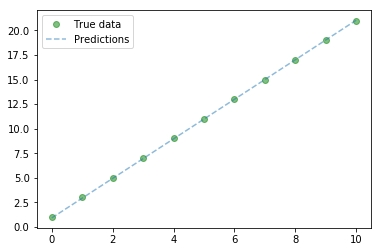

In [46]:
# Clear figure
plt.clf()

# Get predictions
predicted = model(torch.from_numpy(x_train)).data.numpy()

# Plot true data
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()

**Save Model**

In [47]:
save_model = False
if save_model is True:
    # Saves only parameters
    # alpha & beta
    torch.save(model.state_dict(), 'awesome_model.pkl')

**Load Model**

In [48]:
load_model = False
if load_model is True:
    model.load_state_dict(torch.load('awesome_model.pkl'))

## 3. Building a Linear Regression Model with PyTorch (GPU)



GPU: 2 things must be on GPU
- `model`
- `tensors with gradients`

In [50]:
import torch
import torch.nn as nn
import numpy as np

'''
STEP 1: CREATE MODEL CLASS
'''
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 2: INSTANTIATE MODEL CLASS
'''
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)


#######################
#  USE GPU FOR MODEL  #
#######################

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

'''
STEP 3: INSTANTIATE LOSS CLASS
'''

criterion = nn.MSELoss()

'''
STEP 4: INSTANTIATE OPTIMIZER CLASS
'''

learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 5: TRAIN THE MODEL
'''
epochs = 100
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    
    #######################
    #  USE GPU FOR MODEL  #
    #######################
    inputs = torch.from_numpy(x_train).to(device)
    labels = torch.from_numpy(y_train).to(device)
    
    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # Logging
    if epoch % 10 == 0 :
        print('epoch {}, loss {}'.format(epoch, loss.item()))

        # print trainable parameter and it's values
        for name, param in model.named_parameters():
            if param.requires_grad:
                print (name, param.data)

epoch 10, loss 0.05477667599916458
linear.weight tensor([[2.0627]])
linear.bias tensor([0.5646])
epoch 20, loss 0.04895830526947975
linear.weight tensor([[2.0593]])
linear.bias tensor([0.5884])
epoch 30, loss 0.04375787079334259
linear.weight tensor([[2.0560]])
linear.bias tensor([0.6109])
epoch 40, loss 0.03910990059375763
linear.weight tensor([[2.0530]])
linear.bias tensor([0.6321])
epoch 50, loss 0.034955672919750214
linear.weight tensor([[2.0501]])
linear.bias tensor([0.6522])
epoch 60, loss 0.031242620199918747
linear.weight tensor([[2.0474]])
linear.bias tensor([0.6712])
epoch 70, loss 0.027923936024308205
linear.weight tensor([[2.0448]])
linear.bias tensor([0.6892])
epoch 80, loss 0.024957818910479546
linear.weight tensor([[2.0423]])
linear.bias tensor([0.7061])
epoch 90, loss 0.022306814789772034
linear.weight tensor([[2.0400]])
linear.bias tensor([0.7222])
epoch 100, loss 0.019937308505177498
linear.weight tensor([[2.0378]])
linear.bias tensor([0.7373])


# Summary

- Simple **linear regression basics**
    - $y = Ax + B$
    - $y = 2x + 1$
- **Example** of simple linear regression
- **Aim** of linear regression
    - Minimizing distance between the points and the line
        - Calculate "distance" through `MSE`
        - Calculate `gradients`
        - Update parameters with `parameters = parameters - learning_rate * gradients`
        - Slowly update parameters $A$ and $B$ model the linear relationship between $y$ and $x$ of the form $y = 2x + 1$
- Built a linear regression **model** in **CPU and GPU**
    - Step 1: Create Model Class
    - Step 2: Instantiate Model Class
    - Step 3: Instantiate Loss Class
    - Step 4: Instantiate Optimizer Class
    - Step 5: Train Model
- Important things to be on **GPU**
    - `model`
    - `tensors with gradients`
- How to bring to **GPU**?
    - `model_name.cuda()`
    - `variable_name.cuda()`